#### Name: Praanesh Balakrishnan Nair
#### Roll No. BL.EN.U4AIE23123


1. For the given tree apply the BFS algorithm to calculate the time and space 
complexity required in order to reach node K. Compare the same with DFS. <br><br>
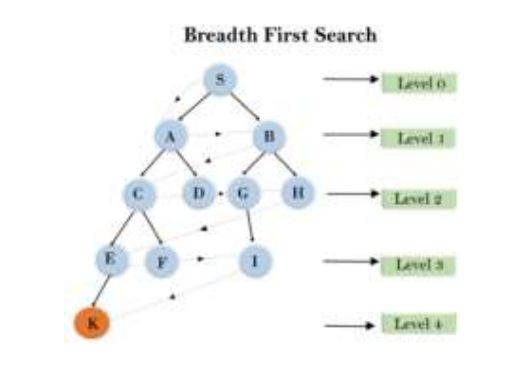

In [32]:
from Python032graphs006breadthFirstSearch import breadthFirstSearch
from Python033graphs007depthFirstSearch import depthFirstSearch
from Python029graphs003adjacencyList import Graph

graph = Graph(['S','A','B','C','D', 'G','H','E','F','I','K'])
graph.add_edge('S','A')
graph.add_edge('S','B')
graph.add_edge('A','C')
graph.add_edge('A','D')
graph.add_edge('B','G')
graph.add_edge('B','H')
graph.add_edge('C','E')
graph.add_edge('C','F')
graph.add_edge('G','I')
graph.add_edge('E','K')


bfs=breadthFirstSearch(graph.graph, 'A')
for i in bfs:
    if i == 'K':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')


print();print()


Dfs=depthFirstSearch(graph.graph, 'S')
for i in Dfs:
    if i == 'K':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')

print();print()







A S C D B E F G H ((K)) I 

S B H G I A D C F E ((K)) 



In [33]:
V = list(graph.graph.keys()).index('K') + 1
E = sum(len(edges) for edges in graph.graph.values())
print(f"BFS Time Complexity: O({V} + {E})")
print(f"BFS Space Complexity: O({V})")
print(f"DFS Time Complexity: O({V} + {E})")
print(f"DFS Space Complexity: O({V})")

BFS Time Complexity: O(11 + 20)
BFS Space Complexity: O(11)
DFS Time Complexity: O(11 + 20)
DFS Space Complexity: O(11)


2. For the given tree apply the DFS algorithm to calculate the time and space 
complexity required in order to reach node G. Compare the same with BFS. <br><br>
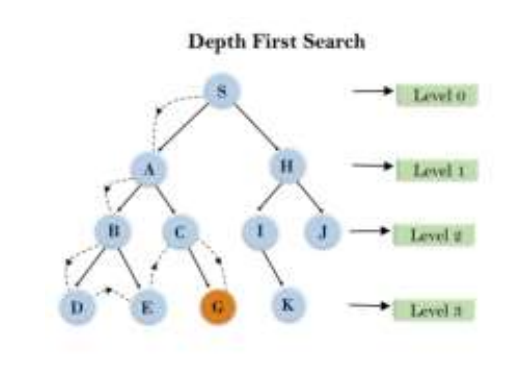

In [34]:
graph = Graph(['S','A','H','B','C','I','J','D','E','G','K'])
graph.add_edge('S','A')
graph.add_edge('S','H')
graph.add_edge('A','B')
graph.add_edge('A','C')
graph.add_edge('H','I')
graph.add_edge('H','J')
graph.add_edge('B','D')
graph.add_edge('B','E')
graph.add_edge('C','G')
graph.add_edge('I','K')
bfs=breadthFirstSearch(graph.graph, 'S')


for i in bfs:
    if i == 'G':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')

print();print()

Dfs=depthFirstSearch(graph.graph, 'S')
for i in Dfs:
    if i == 'G':
        print(f"(({i}))", end=' ')
    else:
        print(i, end=' ')


S A H B C I J D E ((G)) K 

S H J I K A C ((G)) B E D 

In [35]:
V = list(graph.graph.keys()).index('G') + 1
E = sum(len(edges) for edges in graph.graph.values())
print(f"BFS Time Complexity: O({V} + {E})")
print(f"BFS Space Complexity: O({V})")
print(f"DFS Time Complexity: O({V} + {E})")
print(f"DFS Space Complexity: O({V})")

BFS Time Complexity: O(10 + 20)
BFS Space Complexity: O(10)
DFS Time Complexity: O(10 + 20)
DFS Space Complexity: O(10)


### Python032graphs006breadthFirstSearch

In [36]:
import Python029graphs003adjacencyList

def main():
    graph = Python029graphs003adjacencyList.Graph([1, 2, 3, 4, 5, 6, 7])
    graph.add_edge(1, 2)
    graph.add_edge(2, 3)
    graph.add_edge(2, 6)
    graph.add_edge(2, 7)
    graph.add_edge(1, 4)
    graph.add_edge(5, 1)
    print(breadthFirstSearch(graph.graph, 1))

def breadthFirstSearch(graph, start):
    queue = [start]
    visited = []

    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            queue.extend(neighbor for neighbor, _ in graph[vertex] if neighbor not in visited) 
            # add all of the neighbours to the queue 👆
    return visited


### Python033graphs007depthFirstSearch

In [37]:
import Python029graphs003adjacencyList

def main():
    graph = Python029graphs003adjacencyList.Graph([1, 2, 3, 4, 5, 6, 7])
    graph.add_edge(1, 2)
    graph.add_edge(2, 3)
    graph.add_edge(2, 6)
    graph.add_edge(2, 7)
    graph.add_edge(1, 4)
    graph.add_edge(5, 1)
    print(depthFirstSearch(graph.graph, 1))

def depthFirstSearch(graph, start):
    stack = [start]
    visited = []

    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.append(vertex)
            stack.extend(neighbor for neighbor, _ in graph[vertex] if neighbor not in visited)
            # add all of the neighbours to the stack 👆
    return visited


### Python029graphs003adjacencyList

In [38]:
# implementation of graphs using adjacency list
def main():
    graph = Graph([0, 1, 2])
    graph.add_edge(0, 1)
    print(graph.has_selfLoop())
    graph.add_edge(1, 1)
    print(graph)
    print(graph.has_selfLoop())
    graph.remove_edge(1, 1)
    print(graph)
    
class Graph:    
    # Overall Structure:
    # graph is a dictionary: key=vertex, value=list of edges
    # Each edge is a tuple (vertex, weight)
    
    def __init__(self, vertices): # vertices is a list of vertices. Each vertex is a number/character.
        self.graph = {}
        for vertex in vertices:
            self.graph[vertex] = []
            
    def __str__(self):
        result = ""
        for vertex in self.graph:
            result += f"{vertex}: "
            for edge in self.graph[vertex]:
                result += f"{edge[0]}({edge[1]}) "
            result += "\n"
        return result
    
    def add_edge(self, u, v, weight=1):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))
        
    def remove_edge(self, u, v):
        self.graph[u] = [edge for edge in self.graph[u] if edge[0] != v]
        self.graph[v] = [edge for edge in self.graph[v] if edge[0] != u]
    
    def has_selfLoop(self):
        for vertex in self.graph:
            for edge in self.graph[vertex]:
                if vertex == edge[0]:
                    return True
        return False
